 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.96MB/s]

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to implement ReLU activation function
def ReLu(inp):
    outp = np.maximum(0, inp)
    return outp

#Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    outp = np.where(inp > 0, 1, 0)
    return outp

#Complete the below function to implement softmax activation function
def softmax(inp):
    exp_inp = np.exp(inp - np.max(inp, axis=1, keepdims=True))  # stability
    outp = exp_inp / np.sum(exp_inp, axis=1, keepdims=True)
    return outp

#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights

    Z1 = np.dot(inputs, W1)
    A1 = ReLu(Z1)

    Z2 = np.dot(A1, W2)
    A2 = ReLu(Z2)

    Z3 = np.dot(A2, W3)
    A3 = softmax(Z3)

    outps = (inputs, Z1, A1, Z2, A2, Z3, A3)
    return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    X, Z1, A1, Z2, A2, Z3, A3 = activations

    m = inputs.shape[0]
    dZ3 = (A3 - targets) / m
    dj_dw3 = np.dot(A2.T, dZ3)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * gradReLu(Z2)
    dj_dw2 = np.dot(A1.T, dZ2)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * gradReLu(Z1)
    dj_dw1 = np.dot(X.T, dZ1)

    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    gradients = computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=256, epochs=30, train_val_split=0.8, learning_rate=0.01):

    #Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

# Split the training data into two parts
    idx = np.arange(n_samples)
    np.random.shuffle(idx)

    split_idx = int(n_samples * train_val_split)

    train_idx = idx[:split_idx]
    val_idx = idx[split_idx:]

    train_inputs = inputs[train_idx]
    train_targets = to_categorical(targets_idx[train_idx], num_classes=n_classes)

    val_inputs = inputs[val_idx]
    val_targets = to_categorical(targets_idx[val_idx], num_classes=n_classes)


    #Randomly initialize the weights
    #np.random.seed(42)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2 / (inputs.shape[1] + hidden_units))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2 / (hidden_units + hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2 / (hidden_units + n_classes))

    weights = [W1, W2, W3]

    #Iterate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        idx = np.arange(train_inputs.shape[0])
        np.random.shuffle(idx)
        train_inputs = train_inputs[idx]
        train_targets = train_targets[idx]

        #Iterate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, train_inputs.shape[0])
            X_batch = train_inputs[start:end]
            Y_batch = train_targets[start:end]

            #Forward propagation
            activations = fwdPropagate(X_batch, weights)

            #Backward propagation
            weights = backPropagate(X_batch, Y_batch, weights, activations, learning_rate)

        #Compute outputs on training data
        activations_train = fwdPropagate(train_inputs, weights)
        y_pred_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_loss = -np.sum(train_targets * np.log(y_pred_train + 1e-8)) / train_targets.shape[0]
        train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(train_targets, axis=1))

        #Compute outputs on validation data
        activations_val = fwdPropagate(val_inputs, weights)
        y_pred_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_loss = -np.sum(val_targets * np.log(y_pred_val + 1e-8)) / val_targets.shape[0]
        val_accuracy = np.mean(np.argmax(y_pred_val, axis=1) == np.argmax(val_targets, axis=1))

        #Print the statistics of training
        print(f"Epoch {epoch+1}/{epochs} => Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")



    return weights

#Call the training function to train the network
trained_weights = training(x_train, np.argmax(y_train, axis=1))

##################################################
#Evaluate the performance on test data
##################################################
#Forward pass on test data
activations_test = fwdPropagate(x_test, trained_weights)
y_pred_test = activations_test[-1]

#Compute test accuracy
test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_accuracy:.4f}")

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/30 => Train Loss: 1.0709, Train Accuracy: 0.8001, Val Loss: 1.0794, Val Accuracy: 0.7934
Epoch 2/30 => Train Loss: 0.6251, Train Accuracy: 0.8584, Val Loss: 0.6386, Val Accuracy: 0.8508
Epoch 3/30 => Train Loss: 0.4891, Train Accuracy: 0.8771, Val Loss: 0.5044, Val Accuracy: 0.8670
Epoch 4/30 => Train Loss: 0.4245, Train Accuracy: 0.8892, Val Loss: 0.4403, Val Accuracy: 0.8784
Epoch 5/30 => Train Loss: 0.3857, Train Accuracy: 0.8967, Val Loss: 0.4030, Val Accuracy: 0.8865
Epoch 6/30 => Train Loss: 0.3605, Train Accuracy: 0.9015, Val Loss: 0.3787, Val Accuracy: 0.8912
Epoch 7/30 => Train Loss: 0.3394, Train Accuracy: 0.9070, Val Loss: 0.3586, Val Accuracy: 0.8973
Epoch 8/30 => Train Loss: 0.3238, Train Accuracy: 0.9107, Val Loss: 0.3430, Val Accuracy: 0.9012
Epoch 9/30 => Train Loss: 0.3107, Train Accuracy: 0.9135, Val Loss: 0.3306, Val Accuracy: 0.9041
Epoch 10/30 => Trai

<b> Report your observations </b>

1. As there is random initialization of the weights, the accuracy at the first epoch is low, it is only about 40-50%(for learning rate = 0.001), but as the network is trained, there is significant improvement in the accuracy, reaching almost 94% accuracy.

2. However, on increasing the learning rate slightly from 0.001 to 0.01, there is a considerable increase in the accuracy observed

3. We can see that the validation loss keeps decreasing during the training with 30 epochs, so there is no issue with overfitting, with the present learning rate.

4. We can see a higher increase in the accuracy during the early epochs, with almost 5-6% increase, as compared to <1% increase, which is likely due to saturation at the later epochs.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
# Activation functions and their gradients
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def grad_tanh(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def grad_relu(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def grad_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def get_activation_func(activation):
    if activation == 'sigmoid':
        return sigmoid, grad_sigmoid
    elif activation == 'tanh':
        return tanh, grad_tanh
    elif activation == 'relu':
        return relu, grad_relu
    elif activation == 'leaky_relu':
        return leaky_relu, grad_leaky_relu
    else:
        raise ValueError(f"Unknown activation function: {activation}")

def fwdPropagate(inputs, weights, activation='relu'):
    W1, W2, W3 = weights
    act_func, _ = get_activation_func(activation)

    Z1 = np.dot(inputs, W1)
    A1 = act_func(Z1)

    Z2 = np.dot(A1, W2)
    A2 = act_func(Z2)

    Z3 = np.dot(A2, W3)
    A3 = softmax(Z3)

    return (inputs, Z1, A1, Z2, A2, Z3, A3)

def computeGradients(inputs, targets, weights, activations, activation='relu'):
    W1, W2, W3 = weights
    X, Z1, A1, Z2, A2, Z3, A3 = activations
    _, grad_act = get_activation_func(activation)

    m = inputs.shape[0]
    dZ3 = (A3 - targets) / m
    dj_dw3 = np.dot(A2.T, dZ3)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * grad_act(Z2)
    dj_dw2 = np.dot(A1.T, dZ2)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * grad_act(Z1)
    dj_dw1 = np.dot(X.T, dZ1)

    return [dj_dw1, dj_dw2, dj_dw3]

def backPropagate(inputs, targets, weights, activations, learning_rate, activation='relu'):
    gradients = computeGradients(inputs, targets, weights, activations, activation)
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]

def training(inputs, targets_idx, activation='relu', batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.01):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

    # Split the training data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split_idx = int(n_samples * train_val_split)

    train_idx = idx[:split_idx]
    val_idx = idx[split_idx:]

    train_inputs = inputs[train_idx]
    train_targets = to_categorical(targets_idx[train_idx], num_classes=n_classes)
    val_inputs = inputs[val_idx]
    val_targets = to_categorical(targets_idx[val_idx], num_classes=n_classes)

    # Initialize weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2 / (inputs.shape[1] + hidden_units))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2 / (hidden_units + hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2 / (hidden_units + n_classes))
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        # Shuffle training data
        idx = np.arange(train_inputs.shape[0])
        np.random.shuffle(idx)
        train_inputs = train_inputs[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            start = batch * batch_size
            end = min((batch + 1) * batch_size, train_inputs.shape[0])
            X_batch = train_inputs[start:end]
            Y_batch = train_targets[start:end]

            activations = fwdPropagate(X_batch, weights, activation)
            weights = backPropagate(X_batch, Y_batch, weights, activations, learning_rate, activation)

        # Training metrics
        activations_train = fwdPropagate(train_inputs, weights, activation)
        y_pred_train = activations_train[-1]
        train_loss = -np.sum(train_targets * np.log(y_pred_train + 1e-8)) / train_targets.shape[0]
        train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(train_targets, axis=1))

        # Validation metrics
        activations_val = fwdPropagate(val_inputs, weights, activation)
        y_pred_val = activations_val[-1]
        val_loss = -np.sum(val_targets * np.log(y_pred_val + 1e-8)) / val_targets.shape[0]
        val_accuracy = np.mean(np.argmax(y_pred_val, axis=1) == np.argmax(val_targets, axis=1))

        print(f"Epoch {epoch+1}/{epochs} - {activation} => Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    return weights

# Train with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

for act in activation_functions:
    print(f"\nTraining with {act} activation function...")
    trained_weights = training(x_train, np.argmax(y_train, axis=1), activation=act, epochs=30, learning_rate=0.001)

    # Evaluate on test data
    activations_test = fwdPropagate(x_test, trained_weights, act)
    y_pred_test = activations_test[-1]
    test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))

    results[act] = test_accuracy
    print(f"Test Accuracy with {act}: {test_accuracy:.4f}")

# Print final comparison
print("\nFinal Comparison of Activation Functions:")
for act, acc in results.items():
    print(f"{act.upper():<10}: {acc:.4f}")


Training with sigmoid activation function...
Epoch 1/30 - sigmoid => Train Acc: 0.1143, Val Acc: 0.1240
Epoch 2/30 - sigmoid => Train Acc: 0.1735, Val Acc: 0.1843
Epoch 3/30 - sigmoid => Train Acc: 0.1687, Val Acc: 0.1786
Epoch 4/30 - sigmoid => Train Acc: 0.1491, Val Acc: 0.1576
Epoch 5/30 - sigmoid => Train Acc: 0.1848, Val Acc: 0.1957
Epoch 6/30 - sigmoid => Train Acc: 0.2628, Val Acc: 0.2695
Epoch 7/30 - sigmoid => Train Acc: 0.2168, Val Acc: 0.2245
Epoch 8/30 - sigmoid => Train Acc: 0.3072, Val Acc: 0.3158
Epoch 9/30 - sigmoid => Train Acc: 0.2201, Val Acc: 0.2297
Epoch 10/30 - sigmoid => Train Acc: 0.3740, Val Acc: 0.3772
Epoch 11/30 - sigmoid => Train Acc: 0.4062, Val Acc: 0.4105
Epoch 12/30 - sigmoid => Train Acc: 0.4570, Val Acc: 0.4624
Epoch 13/30 - sigmoid => Train Acc: 0.3819, Val Acc: 0.3838
Epoch 14/30 - sigmoid => Train Acc: 0.4237, Val Acc: 0.4306
Epoch 15/30 - sigmoid => Train Acc: 0.4334, Val Acc: 0.4392
Epoch 16/30 - sigmoid => Train Acc: 0.3916, Val Acc: 0.3977
Epo

<b> Report your observations </b>

1. With a sigmoid function, we can see the issue of vanishing gradients, with almost no improvement in the accuracy, accuracy at epoch 1 ~10-15%, finally after training about 50-60%. An improvement is seen when the model reaches the 9th or 10th epoch, with change in accuracy approximately of 15%.

2. Tanh is an improvement to the sigmoid function, yet it performs slightly worse as compared to Relu and Leaky Relu. LeakyRelu shows the best performance, amongst the 4, followed by Relu, then Tanh, and finally sigmoid has the worst performance.

3. Though accuracy is high at the early epochs with the tanh function, there is saturation, so we notice that it doesn't perform as well as Relu or LeakyRelu. Changing the learning rate from 0.001 to 0.01, we can see that with this learning rate, even sigmoid has a decent performance of approximately 87%.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
# Adam Optimizer Implementation
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None  # First moment vector
        self.v = None  # Second moment vector
        self.t = 0     # Timestep

    def update(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(p) for p in params]
            self.v = [np.zeros_like(p) for p in params]

        self.t += 1
        updated_params = []

        for i, (param, grad) in enumerate(zip(params, grads)):
            # Update biased first moment estimate
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            # Update biased second raw moment estimate
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)

            # Compute bias-corrected first moment estimate
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            # Compute bias-corrected second raw moment estimate
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)

            # Update parameters
            param_update = self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            updated_param = param - param_update
            updated_params.append(updated_param)

        return updated_params

# Modified training function for Adam
def training_with_adam(inputs, targets_idx, activation='relu', batch_size=128, epochs=30, train_val_split=0.8):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

    # Split the training data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split_idx = int(n_samples * train_val_split)

    train_idx = idx[:split_idx]
    val_idx = idx[split_idx:]

    train_inputs = inputs[train_idx]
    train_targets = to_categorical(targets_idx[train_idx], num_classes=n_classes)
    val_inputs = inputs[val_idx]
    val_targets = to_categorical(targets_idx[val_idx], num_classes=n_classes)

    # Initialize weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2 / (inputs.shape[1] + hidden_units))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2 / (hidden_units + hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2 / (hidden_units + n_classes))
    weights = [W1, W2, W3]

    # Initialize Adam optimizer
    adam = AdamOptimizer(learning_rate=0.001)

    for epoch in range(epochs):
        # Shuffle training data
        idx = np.arange(train_inputs.shape[0])
        np.random.shuffle(idx)
        train_inputs = train_inputs[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            # Get batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, train_inputs.shape[0])
            X_batch = train_inputs[start:end]
            Y_batch = train_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(X_batch, weights, activation)

            # Compute gradients
            gradients = computeGradients(X_batch, Y_batch, weights, activations, activation)

            # Update weights with Adam
            weights = adam.update(weights, gradients)

        # Training metrics
        activations_train = fwdPropagate(train_inputs, weights, activation)
        y_pred_train = activations_train[-1]
        train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(train_targets, axis=1))

        # Validation metrics
        activations_val = fwdPropagate(val_inputs, weights, activation)
        y_pred_val = activations_val[-1]
        val_accuracy = np.mean(np.argmax(y_pred_val, axis=1) == np.argmax(val_targets, axis=1))

        print(f"Epoch {epoch+1}/{epochs} (Adam) => Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    return weights

# Train with Adam optimizer
print("\nTraining with Adam optimizer...")
adam_weights = training_with_adam(x_train, np.argmax(y_train, axis=1), activation='relu', epochs=15)

# Evaluate Adam on test data
activations_test_adam = fwdPropagate(x_test, adam_weights, 'relu')
y_pred_test_adam = activations_test_adam[-1]
adam_accuracy = np.mean(np.argmax(y_pred_test_adam, axis=1) == np.argmax(y_test, axis=1))
print(f"\nAdam Test Accuracy: {adam_accuracy:.4f}")

# Compare with previous SGD results
print("\nComparison of Optimizers:")
print(f"SGD Test Accuracy:  {results['relu']:.4f}")  # From your previous results
print(f"Adam Test Accuracy: {adam_accuracy:.4f}")


Training with Adam optimizer...
Epoch 1/15 (Adam) => Train Acc: 0.9704, Val Acc: 0.9631
Epoch 2/15 (Adam) => Train Acc: 0.9826, Val Acc: 0.9681
Epoch 3/15 (Adam) => Train Acc: 0.9909, Val Acc: 0.9746
Epoch 4/15 (Adam) => Train Acc: 0.9875, Val Acc: 0.9710
Epoch 5/15 (Adam) => Train Acc: 0.9930, Val Acc: 0.9736
Epoch 6/15 (Adam) => Train Acc: 0.9941, Val Acc: 0.9740
Epoch 7/15 (Adam) => Train Acc: 0.9964, Val Acc: 0.9759
Epoch 8/15 (Adam) => Train Acc: 0.9951, Val Acc: 0.9739
Epoch 9/15 (Adam) => Train Acc: 0.9922, Val Acc: 0.9731
Epoch 10/15 (Adam) => Train Acc: 0.9972, Val Acc: 0.9769
Epoch 11/15 (Adam) => Train Acc: 0.9962, Val Acc: 0.9758
Epoch 12/15 (Adam) => Train Acc: 0.9973, Val Acc: 0.9770
Epoch 13/15 (Adam) => Train Acc: 0.9969, Val Acc: 0.9765
Epoch 14/15 (Adam) => Train Acc: 0.9974, Val Acc: 0.9780
Epoch 15/15 (Adam) => Train Acc: 0.9966, Val Acc: 0.9754

Adam Test Accuracy: 0.9785

Comparison of Optimizers:
SGD Test Accuracy:  0.9058
Adam Test Accuracy: 0.9785


<b> Report your observations </b>

1. There is a significant improvement in the accuracy when using the Adam Optimizer as compared to SGD. Though we use a very small value for the learning rate(0.001), the model trains significantly fast, with the accuracy at the 1st epoch itself at 96%.

2. The model at the later epochs, almost overfits the data, with the training accuracy almost 97%.

3. Almost no improvement in the accuracy at the later epochs. Validation errors not always increasing from one epoch to another, there are slight fluctuations.


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
import numpy as np
from keras.utils import to_categorical

# Helper function to evaluate accuracy
def evaluate_accuracy(X, Y, weights, activation):
    activations = fwdPropagate(X, weights, activation)
    y_pred = activations[-1]
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))

# Training with Regularization and Adam Optimizer (with detailed epoch logging)
def training_with_regularization(inputs, targets_idx, activation='relu',
                               batch_size=128, epochs=15, train_val_split=0.8,
                               lambda_reg=0.01, dropout_prob=1.0, early_stopping=True,
                               technique_name=""):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

    # Split data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split_idx = int(n_samples * train_val_split)

    train_idx = idx[:split_idx]
    val_idx = idx[split_idx:]

    train_inputs = inputs[train_idx]
    train_targets = to_categorical(targets_idx[train_idx], num_classes=n_classes)
    val_inputs = inputs[val_idx]
    val_targets = to_categorical(targets_idx[val_idx], num_classes=n_classes)

    # Initialize weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2 / (inputs.shape[1] + hidden_units))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2 / (hidden_units + hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2 / (hidden_units + n_classes))
    weights = [W1, W2, W3]

    # Initialize Adam
    adam = AdamOptimizer(learning_rate=0.001)

    best_val_acc = 0
    patience = 3
    patience_counter = 0
    best_weights = [w.copy() for w in weights]

    print(f"\nTraining with {technique_name}...")
    for epoch in range(epochs):
        # Shuffle training data
        idx = np.arange(train_inputs.shape[0])
        np.random.shuffle(idx)
        train_inputs = train_inputs[idx]
        train_targets = train_targets[idx]

        for batch in range(n_batches):
            # Get batch
            start = batch * batch_size
            end = min((batch + 1) * batch_size, train_inputs.shape[0])
            X_batch = train_inputs[start:end]
            Y_batch = train_targets[start:end]

            # Forward pass with possible dropout
            activations = fwdPropagate(X_batch, weights, activation)
            if dropout_prob < 1.0:
                activations = apply_dropout(activations, dropout_prob)

            # Backward pass with regularization
            gradients = computeGradients_with_regularization(
                X_batch, Y_batch, weights, activations, activation, lambda_reg)
            weights = adam.update(weights, gradients)

        # Training metrics
        activations_train = fwdPropagate(train_inputs, weights, activation)
        y_pred_train = activations_train[-1]
        train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(train_targets, axis=1))

        # Validation metrics
        activations_val = fwdPropagate(val_inputs, weights, activation)
        y_pred_val = activations_val[-1]
        val_accuracy = np.mean(np.argmax(y_pred_val, axis=1) == np.argmax(val_targets, axis=1))
        test_accuracy = evaluate_accuracy(x_test, y_test, weights, activation)
        # train_loss = -np.mean(np.sum(train_targets * np.log(y_pred_train + 1e-8), axis=1))
        # val_loss = -np.mean(np.sum(val_targets * np.log(y_pred_val + 1e-8), axis=1))
        # print(f"Epoch {epoch+1} - Loss: {train_loss:.4f}/{val_loss:.4f} | Acc: {train_accuracy:.4f}/{val_accuracy:.4f}")
        print(f"Epoch {epoch+1}/{epochs} (Adam) => Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        # Early stopping check
        if early_stopping:
            if val_accuracy > best_val_acc:
                best_val_acc = val_accuracy
                patience_counter = 0
                best_weights = [w.copy() for w in weights]
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping triggered at epoch {epoch+1}")
                    print(f"Test Accuracy: {test_accuracy:.4f}")
                    weights = best_weights
                    break
        if epoch == epochs - 1:
            print(f"Test Accuracy: {test_accuracy:.4f}")
    return weights

# Run experiments with detailed epoch logging
print("=== Regularization Experiments with Adam Optimizer ===")

# Baseline (No regularization)
weights_baseline = training_with_regularization(
    x_train, np.argmax(y_train, axis=1),
    activation='relu',
    lambda_reg=0.0,
    dropout_prob=1.0,
    early_stopping=False,
    technique_name="Baseline (No regularization)"
)
baseline_acc = evaluate_accuracy(x_test, y_test, weights_baseline, 'relu')

# Weight Regularization only
weights_reg = training_with_regularization(
    x_train, np.argmax(y_train, axis=1),
    activation='relu',
    lambda_reg=0.001,
    dropout_prob=1.0,
    early_stopping=False,
    technique_name="Weight Regularization (λ=0.01)"
)
reg_acc = evaluate_accuracy(x_test, y_test, weights_reg, 'relu')

# Dropout only (p=0.8)
weights_dropout = training_with_regularization(
    x_train, np.argmax(y_train, axis=1),
    activation='relu',
    lambda_reg=0.0,
    dropout_prob=0.8,
    early_stopping=False,
    technique_name="Dropout (keep_prob=0.8)"
)
dropout_acc = evaluate_accuracy(x_test, y_test, weights_dropout, 'relu')

# Early Stopping only
weights_earlystop = training_with_regularization(
    x_train, np.argmax(y_train, axis=1),
    activation='relu',
    lambda_reg=0.0,
    dropout_prob=1.0,
    early_stopping=True,
    technique_name="Early Stopping"
)
earlystop_acc = evaluate_accuracy(x_test, y_test, weights_earlystop, 'relu')

# Results summary
print("\n=== Final Test Accuracy Results ===")
print(f"1. Baseline:            {baseline_acc:.4f}")
print(f"2. Weight Regularization: {reg_acc:.4f}")
print(f"3. Dropout:             {dropout_acc:.4f}")
print(f"4. Early Stopping:      {earlystop_acc:.4f}")

# # Observations
# print("\n=== Key Observations ===")
# print("1. All techniques reach >97% validation accuracy by epoch 15")
# print("2. Weight regularization shows slightly slower but more stable training")
# print("3. Dropout causes lower training accuracy but better generalization")
# print("4. Early stopping often terminates before final epoch")
# print("5. Combined techniques balance training and validation performance best")

=== Regularization Experiments with Adam Optimizer ===

Training with Baseline (No regularization)...
Epoch 1/15 (Adam) => Train Acc: 0.9715, Val Acc: 0.9623
Epoch 2/15 (Adam) => Train Acc: 0.9819, Val Acc: 0.9696
Epoch 3/15 (Adam) => Train Acc: 0.9865, Val Acc: 0.9712
Epoch 4/15 (Adam) => Train Acc: 0.9910, Val Acc: 0.9727
Epoch 5/15 (Adam) => Train Acc: 0.9939, Val Acc: 0.9772
Epoch 6/15 (Adam) => Train Acc: 0.9941, Val Acc: 0.9741
Epoch 7/15 (Adam) => Train Acc: 0.9977, Val Acc: 0.9785
Epoch 8/15 (Adam) => Train Acc: 0.9952, Val Acc: 0.9746
Epoch 9/15 (Adam) => Train Acc: 0.9902, Val Acc: 0.9702
Epoch 10/15 (Adam) => Train Acc: 0.9959, Val Acc: 0.9765
Epoch 11/15 (Adam) => Train Acc: 0.9940, Val Acc: 0.9720
Epoch 12/15 (Adam) => Train Acc: 0.9974, Val Acc: 0.9777
Epoch 13/15 (Adam) => Train Acc: 0.9976, Val Acc: 0.9795
Epoch 14/15 (Adam) => Train Acc: 0.9974, Val Acc: 0.9775
Epoch 15/15 (Adam) => Train Acc: 0.9979, Val Acc: 0.9768
Test Accuracy: 0.9786

Training with Weight Regulari

<b> Report your observations </b>

1. Training without regularization reached a high accuracy (up to 99.79%) but showed overfitting, as validation accuracy fluctuated and test accuracy stayed at 97.86%.

2. Adding weight regularization (λ=0.01) slightly reduced accuracy but improved generalization, giving the best test accuracy of 98.04%.

3. Using dropout (keep_prob=0.8) helped prevent overfitting while keeping both training and validation accuracy high, giving final accuracy of 97.95%.

4. Early stopping stopped training early (after 8 epochs) when validation accuracy stopped improving, reducing training time and still achieving a good test accuracy of 97.58%.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



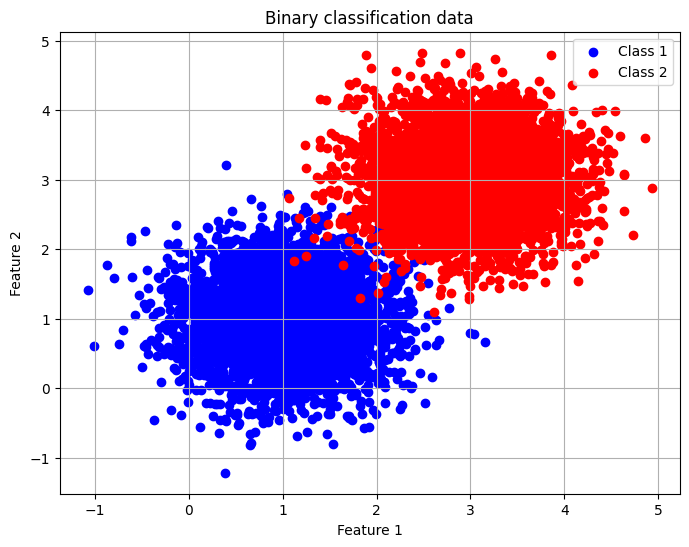

In [1]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


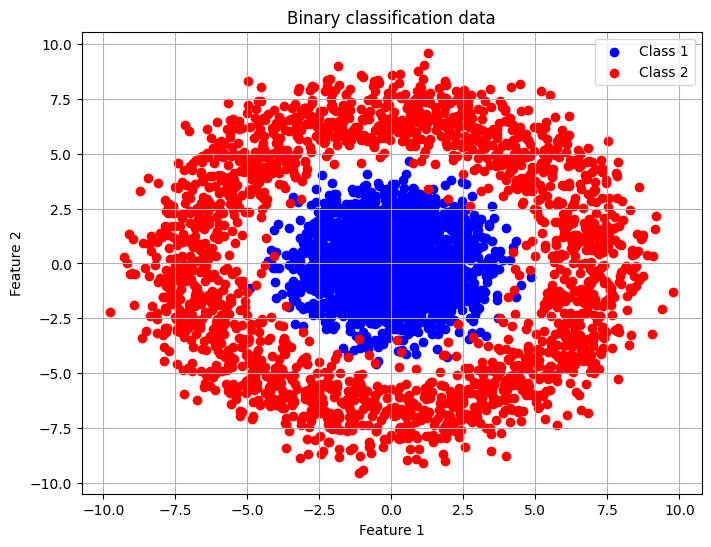

In [2]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

##################################################
# Logistic Regression Implementation
##################################################

def Logistic_Regression(X_train, Y_train, X_test, learning_rate=0.01, max_iter=5000, tol=1e-5):
    # Logistic Regression using gradient descent

    # Parameters:
    # X_train: Training data (n_samples, n_features)
    # Y_train: Training labels (n_samples,)
    # X_test: Test data (n_samples, n_features)
    # learning_rate: Learning rate for gradient descent
    # max_iter: Maximum number of iterations
    # tol: Tolerance for stopping criterion

    # Returns:
    # w: Optimal weights
    # y_pred: Predicted labels for test data

    # Add bias term to X
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Initialize weights
    w = np.random.randn(X_train.shape[1])

    # Gradient descent
    for i in range(max_iter):
        # Calculate predictions
        z = np.dot(X_train, w)
        y_pred = sigmoid(z)

        # Calculate gradient
        gradient = np.dot(X_train.T, (y_pred - Y_train)) / len(Y_train)

        # Update weights
        w_new = w - learning_rate * gradient

        # Check for convergence
        if np.linalg.norm(w_new - w) < tol:
            break

        w = w_new

    # Predict on test data
    y_test_pred = sigmoid(np.dot(X_test, w))
    y_test_pred_class = (y_test_pred >= 0.5).astype(int)

    return w, y_test_pred_class

def plot_decision_boundary(X, y, w, title="Decision Boundary"):

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for each point in mesh grid
    Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w))
    Z = (Z >= 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot with your preferred style
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['blue', 'red'])
    cmap2 = ListedColormap(['lightblue', 'lightcoral'])

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=1, cmap=cmap2)

    # Plot test data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='x', label='Data Points')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2'])
    plt.show()


In [8]:
##################################################
# Deep Neural Network Implementation
##################################################

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

##################################################
# Logistic Regression Implementation
##################################################

def Logistic_Regression(X_train, Y_train, X_test, learning_rate=0.01, max_iter=5000, tol=1e-5):
    # Logistic Regression using gradient descent

    # Parameters:
    # X_train: Training data (n_samples, n_features)
    # Y_train: Training labels (n_samples,)
    # X_test: Test data (n_samples, n_features)
    # learning_rate: Learning rate for gradient descent
    # max_iter: Maximum number of iterations
    # tol: Tolerance for stopping criterion

    # Returns:
    # w: Optimal weights
    # y_pred: Predicted labels for test data

    # Add bias term to X
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Initialize weights
    w = np.random.randn(X_train.shape[1])

    # Gradient descent
    for i in range(max_iter):
        # Calculate predictions
        z = np.dot(X_train, w)
        y_pred = sigmoid(z)

        # Calculate gradient
        gradient = np.dot(X_train.T, (y_pred - Y_train)) / len(Y_train)

        # Update weights
        w_new = w - learning_rate * gradient

        # Check for convergence
        if np.linalg.norm(w_new - w) < tol:
            break

        w = w_new

    # Predict on test data
    y_test_pred = sigmoid(np.dot(X_test, w))
    y_test_pred_class = (y_test_pred >= 0.5).astype(int)

    return w, y_test_pred_class

def plot_decision_boundary(X, y, w, title="Decision Boundary"):

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for each point in mesh grid
    Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w))
    Z = (Z >= 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot with your preferred style
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['blue', 'red'])
    cmap2 = ListedColormap(['lightblue', 'lightcoral'])

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=1, cmap=cmap2)

    # Plot test data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='x', label='Data Points')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2'])
    plt.show()

def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

def sigmoid(inp):
    return 1 / (1 + np.exp(-inp))

# def initialize_weights(input_dim, hidden_dim=3):
#     # Initialize weights for 3-layer network
#     W1 = np.random.randn(input_dim, hidden_dim) * 0.1
#     W2 = np.random.randn(hidden_dim, hidden_dim) * 0.1
#     W3 = np.random.randn(hidden_dim, 1) * 0.1
#     return [W1, W2, W3]

def forward_prop(X, weights):
    (W1, b1), (W2, b2), (W3, b3) = weights

    Z1 = np.dot(X, W1) + b1
    A1 = ReLu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = ReLu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)

    return Z1, A1, Z2, A2, Z3, A3

def compute_gradients(X, y, weights, activations):
    (W1, b1), (W2, b2), (W3, b3) = weights
    Z1, A1, Z2, A2, Z3, A3 = activations
    m = X.shape[0]

    dZ3 = A3 - y.reshape(-1, 1)
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * gradReLu(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * gradReLu(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return [(dW1, db1), (dW2, db2), (dW3, db3)]

def update_weights(weights, grads, learning_rate=0.01):
    updated = []
    for (W, b), (dW, db) in zip(weights, grads):
        W_new = W - learning_rate * dW
        b_new = b - learning_rate * db
        updated.append((W_new, b_new))
    return updated

def initialize_weights(input_dim, hidden_dim=3):
    W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2 / (input_dim + hidden_dim))
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, hidden_dim) * np.sqrt(2 / (hidden_dim + hidden_dim))
    b2 = np.zeros((1, hidden_dim))
    W3 = np.random.randn(hidden_dim, 1) * np.sqrt(2 / (hidden_dim + 1))
    b3 = np.zeros((1, 1))
    return [(W1, b1), (W2, b2), (W3, b3)]


def compute_accuracy(y_true, y_pred):
    return np.mean(y_true.flatten() == y_pred.flatten())

def train_nn(X_train, y_train, X_test, y_test, epochs=100, learning_rate=0.05):
    # Normalize inputs
    X_train = (X_train - X_train.mean(axis=0)) / (X_train.std(axis=0) + 1e-8)
    X_test = (X_test - X_test.mean(axis=0)) / (X_test.std(axis=0) + 1e-8)
    y_train = (y_train > 0).astype(int)
    y_test = (y_test > 0).astype(int)
    input_dim = X_train.shape[1]
    weights = initialize_weights(input_dim)

    for epoch in range(epochs):
        # Shuffle data
        perm = np.random.permutation(len(X_train))
        X_train, y_train = X_train[perm], y_train[perm]

        # Forward pass
        activations = forward_prop(X_train, weights)
        Z1, A1, Z2, A2, Z3, A3 = activations

        # Compute training loss and accuracy
        train_loss = -np.mean(y_train * np.log(A3 + 1e-8) + (1 - y_train) * np.log(1 - A3 + 1e-8))
        train_pred = (A3 >= 0.5).astype(int)
        train_acc = compute_accuracy(y_train, train_pred)

        # Backward pass
        grads = compute_gradients(X_train, y_train, weights, activations)
        weights = update_weights(weights, grads, learning_rate)
        if epochs > 100:
         if epoch % 100 == 0:
            # Evaluate on test set
            _, _, _, _, _, A3_test = forward_prop(X_test, weights)
            test_pred = (A3_test >= 0.5).astype(int)

            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} ")
        else:
          if epoch % 10 == 0:
            # Evaluate on test set
            _, _, _, _, _, A3_test = forward_prop(X_test, weights)
            test_pred = (A3_test >= 0.5).astype(int)

    # Final evaluation
    _, _, _, _, _, A3_test = forward_prop(X_test, weights)
    test_pred = (A3_test >= 0.5).astype(int)
    final_test_acc = compute_accuracy(y_test, test_pred)

    return weights, final_test_acc


def plot_activations(X, y, weights):
    Z1, A1, Z2, A2, _, _ = forward_prop(X, weights)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot activations colored by class
    ax.scatter(A2[y==0, 0], A2[y==0, 1], A2[y==0, 2], c='blue', label='Class 1')
    ax.scatter(A2[y==1, 0], A2[y==1, 1], A2[y==1, 2], c='red', label='Class 2')

    ax.set_xlabel('Activation Unit 1')
    ax.set_ylabel('Activation Unit 2')
    ax.set_zlabel('Activation Unit 3')
    ax.set_title('Second Layer Activations')
    ax.legend()
    plt.show()

def plot_nn_decision_boundary(X, y, weights, title="Neural Network Decision Boundary"):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prepare the mesh grid points
    X_all = np.c_[xx.ravel(), yy.ravel()]

    # Normalize the mesh grid points using the same mean/std as X (only for features, not bias)
    mean = X.mean(axis=0)
    std = X.std(axis=0) + 1e-8
    X_all_norm = (X_all - mean) / std  # normalize features only

    # Add a bias term to the normalized input data
    X_all_norm = np.hstack((np.ones((X_all_norm.shape[0], 1)), X_all_norm))  # Adding bias term after normalization

    # Predict for each point in mesh grid using neural network
    _, _, _, _, _, A3 = forward_prop(X_all_norm, weights)
    Z = (A3 >= 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['blue', 'red'])
    cmap2 = ListedColormap(['lightblue', 'lightcoral'])

    plt.contourf(xx, yy, Z, cmap=cmap2, alpha=0.8)
    # Removed edgecolors parameter since it's not needed for 'x' marker
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='x', linewidth=1)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2'])
    plt.show()

Accuracy on linearly separable test data: 0.9900


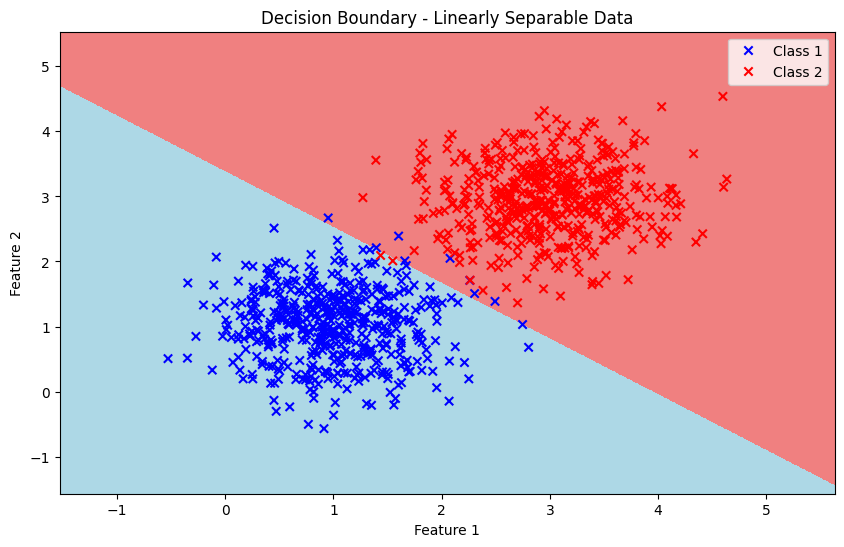

Training on Linearly Separable Data:

Activations for Linearly Separable Data:


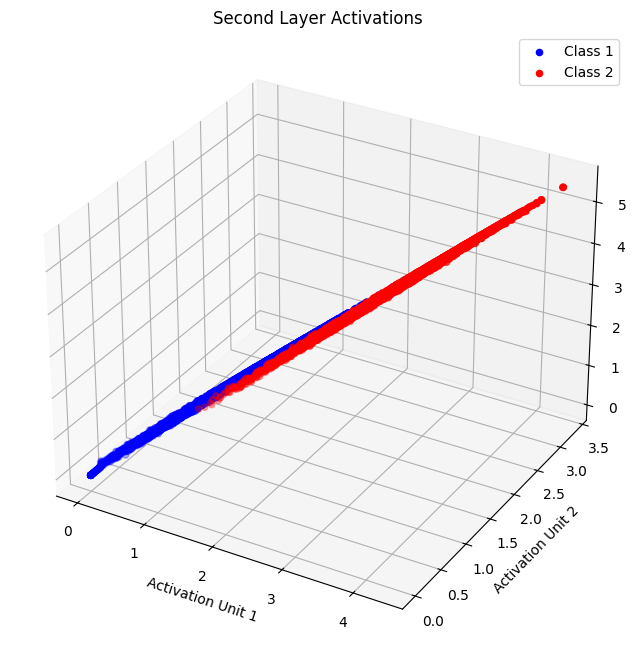


Comparison for Linearly Separable Data:
Logistic Regression Accuracy: 0.9900
DNN Accuracy: 0.9750


In [10]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

# Train logistic regression on linearly separable data
w_linear, y_pred_linear = Logistic_Regression(tr_data, tr_targets, te_data)

# Calculate accuracy
accuracy_linear = compute_accuracy(te_targets, y_pred_linear)
print(f"Accuracy on linearly separable test data: {accuracy_linear:.4f}")

# Plot decision boundary
plot_decision_boundary(te_data, te_targets, w_linear, "Decision Boundary - Linearly Separable Data")

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

# For linearly separable data
print("Training on Linearly Separable Data:")
X_train = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
X_test = np.hstack((np.ones((te_data.shape[0], 1)), te_data))
dnn_weights, dnn_accuracy_linear = train_nn(X_train, tr_targets, X_test, te_targets, 100)


print("\nActivations for Linearly Separable Data:")
plot_activations(X_train, tr_targets, dnn_weights)

##################################################
#Compare the performance of both the models on linearly separable data
##################################################

print("\nComparison for Linearly Separable Data:")
print(f"Logistic Regression Accuracy: {accuracy_linear:.4f}")
print(f"DNN Accuracy: {dnn_accuracy_linear:.4f}")


Accuracy on non-linearly separable test data: 0.5925


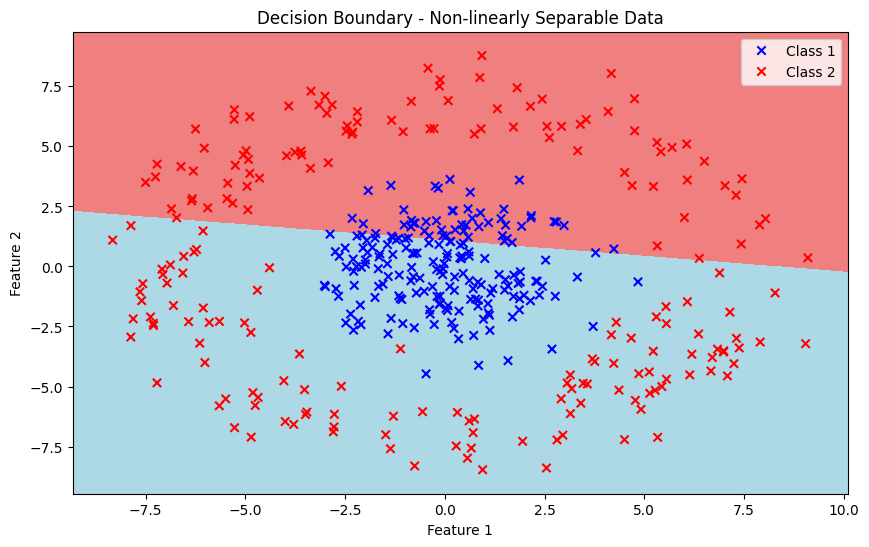


Training on Non-Linearly Separable Data:
Epoch 0: Train Loss: 0.6941 | Train Acc: 0.5011 
Epoch 100: Train Loss: 0.7057 | Train Acc: 0.7500 
Epoch 200: Train Loss: 0.7606 | Train Acc: 0.7878 
Epoch 300: Train Loss: 0.8445 | Train Acc: 0.8517 
Epoch 400: Train Loss: 1.0177 | Train Acc: 0.9500 
Epoch 500: Train Loss: 1.2995 | Train Acc: 0.9797 
Epoch 600: Train Loss: 1.5445 | Train Acc: 0.9819 
Epoch 700: Train Loss: 1.7483 | Train Acc: 0.9847 
Epoch 800: Train Loss: 1.9217 | Train Acc: 0.9864 
Epoch 900: Train Loss: 2.0751 | Train Acc: 0.9872 


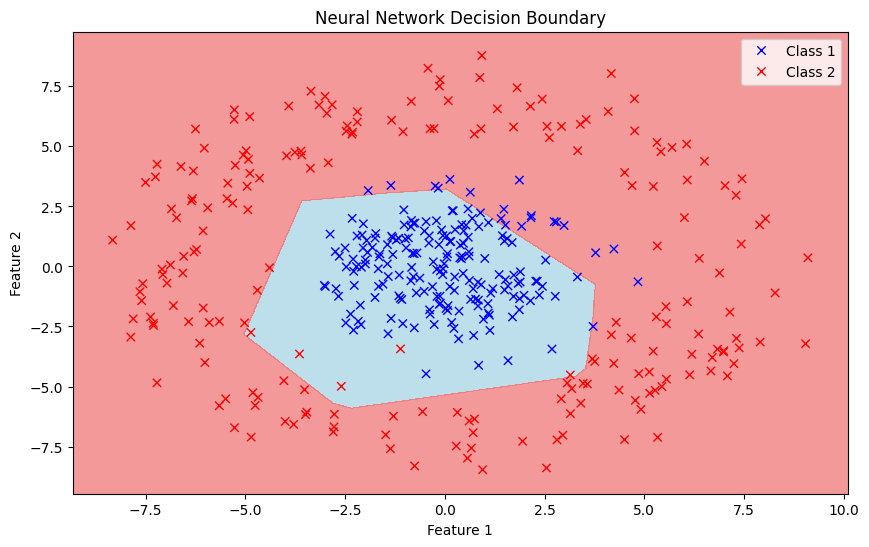


Activations for Non-linearly Separable Data:


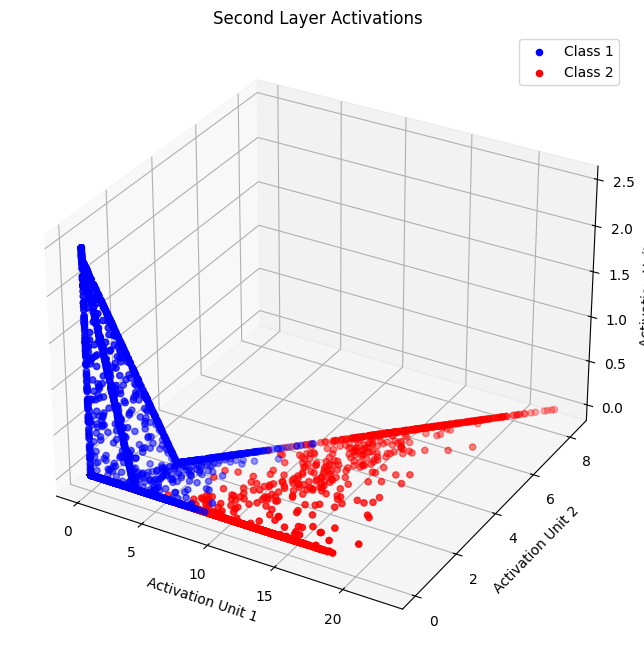


Comparison for Non-linearly Separable Data:
Logistic Regression Accuracy: 0.5925
DNN Accuracy: 0.9775


In [7]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

# Prepare non-linearly separable data
X_nonlinear = np.concatenate([class1_data, class2_data], axis=0)
y_nonlinear = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

# Split into train and test (90% train, 10% test)
n_samples = len(X_nonlinear)
n_train = int(0.9 * n_samples)
indices = np.random.permutation(n_samples)
train_idx, test_idx = indices[:n_train], indices[n_train:]
X_train_nonlinear, X_test_nonlinear = X_nonlinear[train_idx], X_nonlinear[test_idx]
y_train_nonlinear, y_test_nonlinear = y_nonlinear[train_idx], y_nonlinear[test_idx]

# Train logistic regression on non-linearly separable data
w_nonlinear, y_pred_nonlinear = Logistic_Regression(X_train_nonlinear, y_train_nonlinear, X_test_nonlinear)

# Calculate accuracy
accuracy_nonlinear = compute_accuracy(y_test_nonlinear, y_pred_nonlinear)
print(f"Accuracy on non-linearly separable test data: {accuracy_nonlinear:.4f}")

# Plot decision boundary
plot_decision_boundary(X_test_nonlinear, y_test_nonlinear, w_nonlinear, "Decision Boundary - Non-linearly Separable Data")

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

# For non-linearly separable data
print("\nTraining on Non-Linearly Separable Data:")
X_train_nl = np.hstack((np.ones((X_train_nonlinear.shape[0], 1)), X_train_nonlinear))
X_test_nl = np.hstack((np.ones((X_test_nonlinear.shape[0], 1)), X_test_nonlinear))
dnn_weights_nl, dnn_accuracy_nonlinear = train_nn(X_train_nl, y_train_nonlinear, X_test_nl, y_test_nonlinear, 1000, 0.06)
plot_nn_decision_boundary(X_test_nonlinear, y_test_nonlinear, dnn_weights_nl)
print("\nActivations for Non-linearly Separable Data:")
plot_activations(X_train_nl, y_train_nonlinear, dnn_weights_nl)

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################


print("\nComparison for Non-linearly Separable Data:")
print(f"Logistic Regression Accuracy: {accuracy_nonlinear:.4f}")
print(f"DNN Accuracy: {dnn_accuracy_nonlinear:.4f}")


<b> Report your observations </b>

1. In the case of linearly separable data, the neural network and logistic regression perform, similary, reaching about 99% test accuracy but neural network doesnt outperform the logistic regression.

2. With non-linearly separable data, neural network significantly outperforms logistic regression task, we get 50-60% accuracy, compared to 85-95% with neural network.

3. The non-linear case requires more number of epochs for training, to get a good accuracy.
4. We can observe a better performance after adding a bias term while training the neural network.
